# Analize Exploratoria FORD
## Dados Retirados do OBD 
Analize exploratoria vizando treinar uma IA de classificação afim de predizer possiveis erros de funcionamento e quebras no ambiente interno do veiculo e dando dicas de boa pratica ao proprietario do veiculo

In [1]:
# Processamento de dados
import pandas as pd  # trabalhar com tabelas
import numpy as np   # trabalhar com vetores e matrizes
from collections import Counter #Checar a quantidade de Strings diferentes que um atributo possui


# Aprendizado de Máquina
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Escalonamento 
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold # Separação treino e teste
from sklearn.model_selection import GridSearchCV # Encontrar os melhores hiperparametros para um modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

from sklearn.metrics import make_scorer, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Métricas de desempenho Regressao
from sklearn.metrics.scorer import accuracy_scorer

# Classificadores
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier  # Classificador ingênuo para baseline 
from sklearn.tree import DecisionTreeClassifier # Arvores de Decisão
from sklearn.ensemble import RandomForestClassifier # RandomForest

from sklearn.pipeline import make_pipeline

# Regressão
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree  # Plotar árvore de decisão

# Datasets
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Colunas do DataSet
- TEMPO DE FUNCIONAMENTO DO MOTOR
- RPM DO MOTOR
- VELOCIDADE DO VEICULO
- ACELERAR
- CARGA DO MOTOR
- TEMPERATURA DO REFRIGERANTE
- BANCO 1 DE COMPENSAÇÃO DE COMBUSTÍVEL DE LONGO PRAZO
- BANCO 1 DE COMPENSAÇÃO DE COMBUSTÍVEL DE CURTO PRAZO
- PRESSÃO DO MANIFOLD DE ADMISSÃO
- TANQUE DE COMBUSTÍVEL
- ACELERAÇÃO ABSOLUTA
- PEDAL D
- PEDAL E
- ATUADOR DE ACELERADOR COMANDADO
- RELAÇÃO DE EQUIV AR COMBUSTÍVEL COMBUSTÍVEL
- PRESSÃO BAROMÉTRICA ABSOLUTA
- POSIÇÃO RELATIVA DO ACELERADOR
- TEMP. DO AR DE ENTRADA
- AVANÇO DE TEMPO
- BANCO DE TEMPERATURA DO CATALISADOR 1 SENSOR 1
- BANCO DE TEMPERATURA DO CATALISADOR 1 SENSOR 2
- TENSÃO DO MÓDULO DE CONTROLE
- PURGA EVAPORATIVA COMANDADA
- TEMPO EXECUTADO COM MIL LIGADO
- TEMPO DESDE OS CÓDIGOS DE PROBLEMAS APAGADOS
- DISTÂNCIA VIAJADA COM MIL ON
- WARM UPS DESDE OS CÓDIGOS APAGADOS 0

In [2]:
car1 = pd.read_csv('live1.csv' , dtype = float)

In [3]:
car1.head().count()

ENGINE_RUN_TINE ()                       5
ENGINE_RPM ()                            5
VEHICLE_SPEED ()                         5
THROTTLE ()                              5
ENGINE_LOAD ()                           5
COOLANT_TEMPERATURE ()                   5
LONG_TERM_FUEL_TRIM_BANK_1 ()            5
SHORT_TERM_FUEL_TRIM_BANK_1 ()           5
INTAKE_MANIFOLD_PRESSURE ()              5
FUEL_TANK ()                             5
ABSOLUTE_THROTTLE_B ()                   5
PEDAL_D ()                               5
PEDAL_E ()                               5
COMMANDED_THROTTLE_ACTUATOR ()           5
FUEL_AIR_COMMANDED_EQUIV_RATIO ()        5
ABSOLUTE_BAROMETRIC_PRESSURE ()          5
RELATIVE_THROTTLE_POSITION ()            5
INTAKE_AIR_TEMP ()                       5
TIMING_ADVANCE ()                        5
CATALYST_TEMPERATURE_BANK1_SENSOR1 ()    5
CATALYST_TEMPERATURE_BANK1_SENSOR2 ()    5
CONTROL_MODULE_VOLTAGE ()                5
COMMANDED_EVAPORATIVE_PURGE ()           5
TIME_RUN_WI

In [4]:
car1.describe()

,ENGINE_RUN_TINE (),ENGINE_RPM (),VEHICLE_SPEED (),THROTTLE (),ENGINE_LOAD (),COOLANT_TEMPERATURE (),LONG_TERM_FUEL_TRIM_BANK_1 (),SHORT_TERM_FUEL_TRIM_BANK_1 (),INTAKE_MANIFOLD_PRESSURE (),FUEL_TANK (),...,INTAKE_AIR_TEMP (),TIMING_ADVANCE (),CATALYST_TEMPERATURE_BANK1_SENSOR1 (),CATALYST_TEMPERATURE_BANK1_SENSOR2 (),CONTROL_MODULE_VOLTAGE (),COMMANDED_EVAPORATIVE_PURGE (),TIME_RUN_WITH_MIL_ON (),TIME_SINCE_TROUBLE_CODES_CLEARED (),DISTANCE_TRAVELED_WITH_MIL_ON (),WARM_UPS_SINCE_CODES_CLEARED ()
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,...,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.0,3853.000000,3853.0,3853.0,0.0
mean,1139.646444,19.578510,18.914012,34.701149,80.605762,-1.200972,-0.755296,35.579808,32.783825,51.111789,...,7.924474,471.790189,326.478536,13.781618,26.694961,0.0,7850.296392,0.0,255.0,NaN
std,426.717558,19.463651,2.846920,13.338597,13.591008,1.803688,4.574067,13.785298,4.790601,3.600117,...,10.476610,85.096488,108.696590,0.253793,32.330095,0.0,9.142939,0.0,0.0,NaN
min,0.000000,0.000000,15.686275,0.000000,25.000000,-7.812500,-19.531250,18.000000,9.019608,44.705883,...,-20.000000,25.699997,24.599998,10.332000,0.000000,0.0,7835.000000,0.0,255.0,NaN
25%,754.500000,0.000000,16.470589,26.274509,81.000000,-2.343750,-3.125000,26.000000,29.411764,47.843136,...,0.000000,413.299988,259.100006,13.671000,0.000000,0.0,7842.000000,0.0,255.0,NaN
50%,971.750000,16.000000,18.431372,30.588236,86.000000,-0.781250,0.000000,32.000000,32.941177,50.588234,...,4.000000,486.299988,359.600006,13.769000,14.117647,0.0,7850.000000,0.0,255.0,NaN
75%,1496.750000,37.000000,20.392157,38.039215,88.000000,-0.781250,2.343750,39.000000,37.254902,52.941177,...,18.000000,541.099976,413.399994,13.925000,42.745098,0.0,7858.000000,0.0,255.0,NaN
max,2334.250000,60.000000,45.490196,98.431374,95.000000,2.343750,11.718750,101.000000,53.725491,82.352943,...,31.000000,600.700012,473.500000,14.414000,100.000000,0.0,7866.000000,0.0,255.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E536344C10>,
      dtype=object)

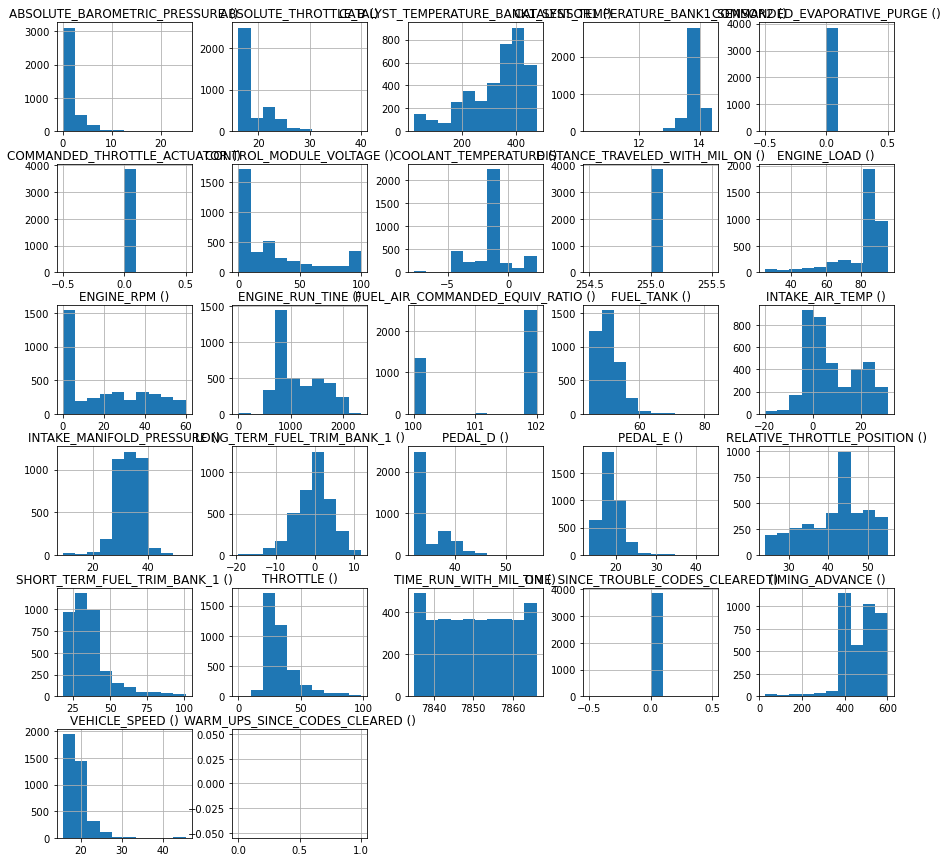

In [5]:
car1.hist(figsize=(15,15))

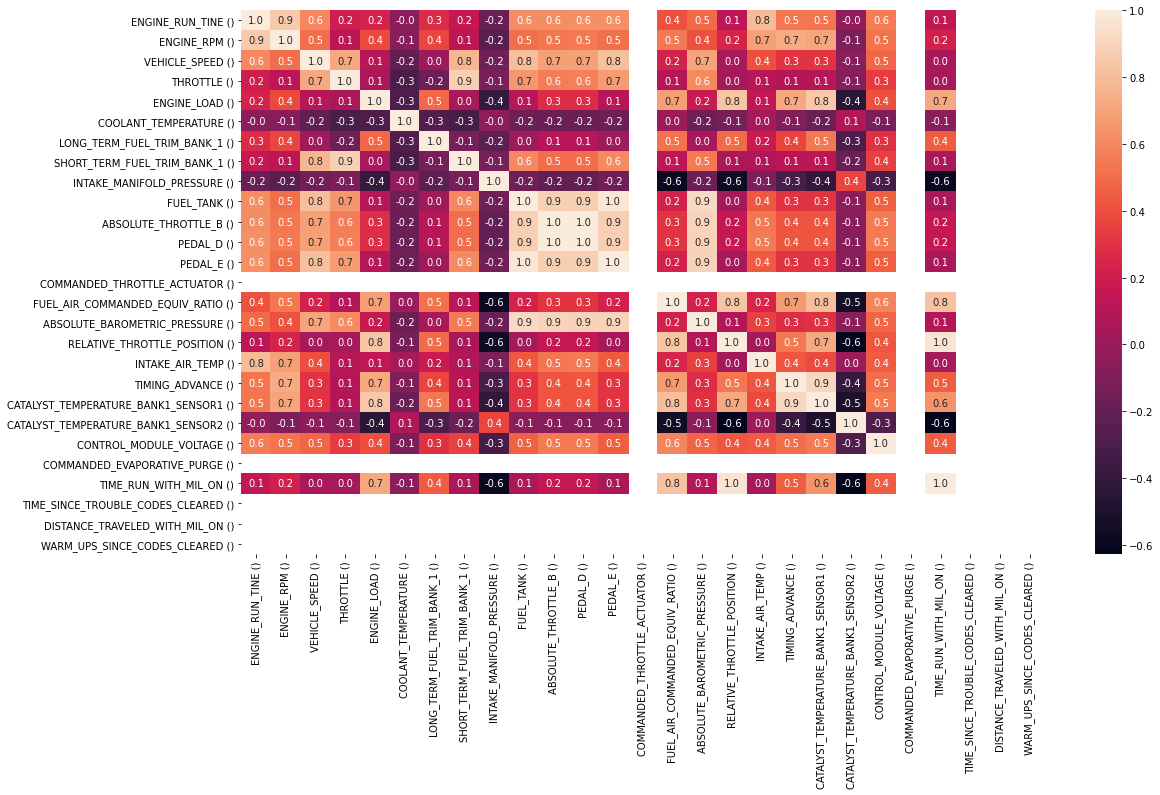

In [6]:
plt.figure(figsize=(18,10))
sns.heatmap(car1.corr(method = 'pearson'), annot=True, fmt=".1f");

## OBSERVAÇÃO 
# Analizando o head map do nosso data set, observamos que a quantidade de gasolina no tank de combustivel corresponde bem a velocidade na qual nos locomovemos pelo trajeto andar em velocidades menores gasta menos combustivel por mais que aumente o tempo para concluir o trajeto, andar em velocidade constante tambem colabora com a economia do combustivel, uma vez que o veiculo queima mais combusivel para sair do estado inerte para começar a andar
# O sensor de pressão barometrica tambem esta bem relacionado com a economia de combustivel uma vez que se a pressão no motor estiver fora dos parametros desejaveis o motor pode começar a falhar rapidamente e o gasto de combustivel vai ser muito maior

# Então em ordem decrescente de gasto de combustivel temos :
# Pressão barometrica absoluta
# Aceleração
# Velocidade 
# Freio (Freio entra pelo fato que apos freiar teremos uma aceleração grande apos então ele acaba se relacionando)
# A temperatura no motor (O que esta ligado pelas leis da fisica a pressão)

<ipython-input-7-3a2295c7aca9>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
<ipython-input-7-3a2295c7aca9>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,2)


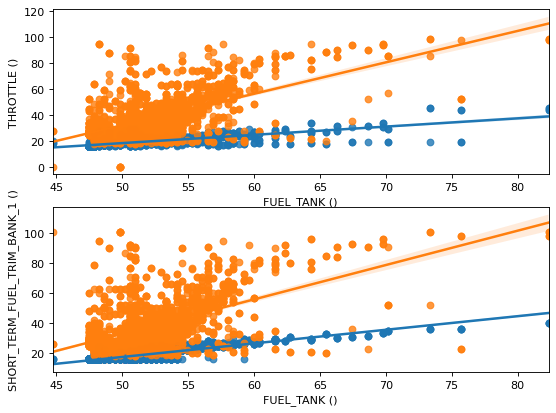

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'VEHICLE_SPEED ()')
plt.subplot(2,1,1)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'THROTTLE ()')
plt.subplot(2,1,2)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'ABSOLUTE_THROTTLE_B ()')
plt.subplot(2,1,2)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'SHORT_TERM_FUEL_TRIM_BANK_1 ()')

<ipython-input-8-b86db21adc81>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


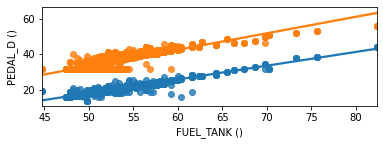

In [8]:
plt.subplot(2,1,1)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'PEDAL_E ()')
plt.subplot(2,1,1)
sns.regplot(data = car1, x = 'FUEL_TANK ()', y = 'PEDAL_D ()')

In [9]:
x = car1.drop(columns = ['ENGINE_RUN_TINE ()',                     
'ENGINE_RPM ()',                            
'ENGINE_LOAD ()',                           
'COOLANT_TEMPERATURE ()',                   
'LONG_TERM_FUEL_TRIM_BANK_1 ()',            
'INTAKE_MANIFOLD_PRESSURE ()',              
'COMMANDED_THROTTLE_ACTUATOR ()',           
'FUEL_AIR_COMMANDED_EQUIV_RATIO ()',        
'RELATIVE_THROTTLE_POSITION ()',            
'INTAKE_AIR_TEMP ()',                       
'TIMING_ADVANCE ()',                       
'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',    
'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()',    
'CONTROL_MODULE_VOLTAGE ()',                
'COMMANDED_EVAPORATIVE_PURGE ()',           
'TIME_RUN_WITH_MIL_ON ()',                  
'TIME_SINCE_TROUBLE_CODES_CLEARED ()',      
'DISTANCE_TRAVELED_WITH_MIL_ON ()',         
'WARM_UPS_SINCE_CODES_CLEARED ()',
'FUEL_TANK ()'                        ])

y = car1['FUEL_TANK ()']
y=y.astype('float')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3, random_state=42)

[ 0.05327816 -0.01156829  0.00594147  0.48811013 -0.48361158  0.99169617
  0.30238697] 38.73752599964891
[ 5.10552992e-13 -1.23323559e+00 -1.60847673e-01  4.02501008e-01
 -1.32973576e+00  3.70809474e+00  8.39402743e-01 -1.91347394e+00
  7.92634117e-03 -3.69347888e-03  2.22857526e-04 -7.62838452e-02
  8.23899427e-02 -1.52125844e-02  9.14732595e-03  3.73131750e-05
  4.39971686e-04 -4.11978830e-03 -1.29492043e-03  1.81144556e-02
 -9.30822447e-03 -1.47389771e-04  1.81315531e-02 -1.46213650e-02
 -1.37691875e-02  7.37146592e-03  1.41800777e-01 -4.86327365e-02
 -3.10367835e-02 -2.76141278e-01 -7.16327014e-02  2.00179529e-02
  2.42194015e-01  7.51741446e-03 -6.35909020e-02  7.18739739e-02] -6.137912588539017
26.76776884617241


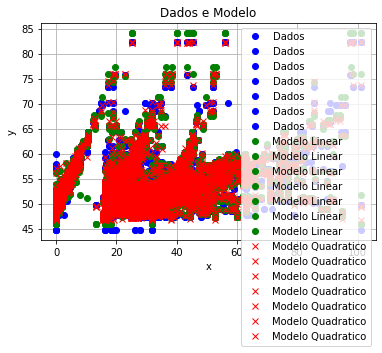

In [11]:
modelo_linear = LinearRegression().fit(x_train, y_train)
a_modelo = modelo_linear.coef_
b_modelo = modelo_linear.intercept_
print(a_modelo, b_modelo)

func_2 = PolynomialFeatures(degree=2)
xt_ = func_2.fit_transform(x_train)
modelo_quadratico = LinearRegression().fit(xt_ , y_train)
a_modelo = modelo_quadratico.coef_
b_modelo = modelo_quadratico.intercept_
print(a_modelo, b_modelo)

fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Dados')
plt.plot(x_train, modelo_linear.predict(x_train), 'og', linewidth=3, label='Modelo Linear')
plt.plot(x_train, modelo_quadratico.predict(xt_), 'xr', linewidth=3, label='Modelo Quadratico')
ax.set(xlabel='x', ylabel='y', title='Dados e Modelo')
plt.legend()
ax.grid()

y_pred_linear = modelo_linear.predict(x_test)

xtest_ = func_2.fit_transform(x_test)
y_pred_quadratico = modelo_quadratico.predict(xtest_)

erro_linear = sum(y_test-y_pred_linear)
erro_quadratico = y_test-y_pred_quadratico
print(erro_linear)

In [12]:
# Mean Squared Error é uma métrica
MSE_linear = mean_squared_error(y_test, y_pred_linear)
MSE_quadratico = mean_squared_error(y_test, y_pred_quadratico)
print(MSE_linear, MSE_quadratico)

# Outra métrica de desempenho
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MAE_quadratico = mean_absolute_error(y_test, y_pred_quadratico)
print(MAE_linear, MAE_quadratico)

# Outra métrica de desempenho
R2_linear = modelo_linear.score(x_train, y_train)
R2_quadratico = modelo_quadratico.score(xt_, y_train)
print(R2_linear, R2_quadratico)


0.3952790122598893 0.2748307394034671
0.35805860007356055 0.31828699627815515
0.9725425029932631 0.9819396234414839


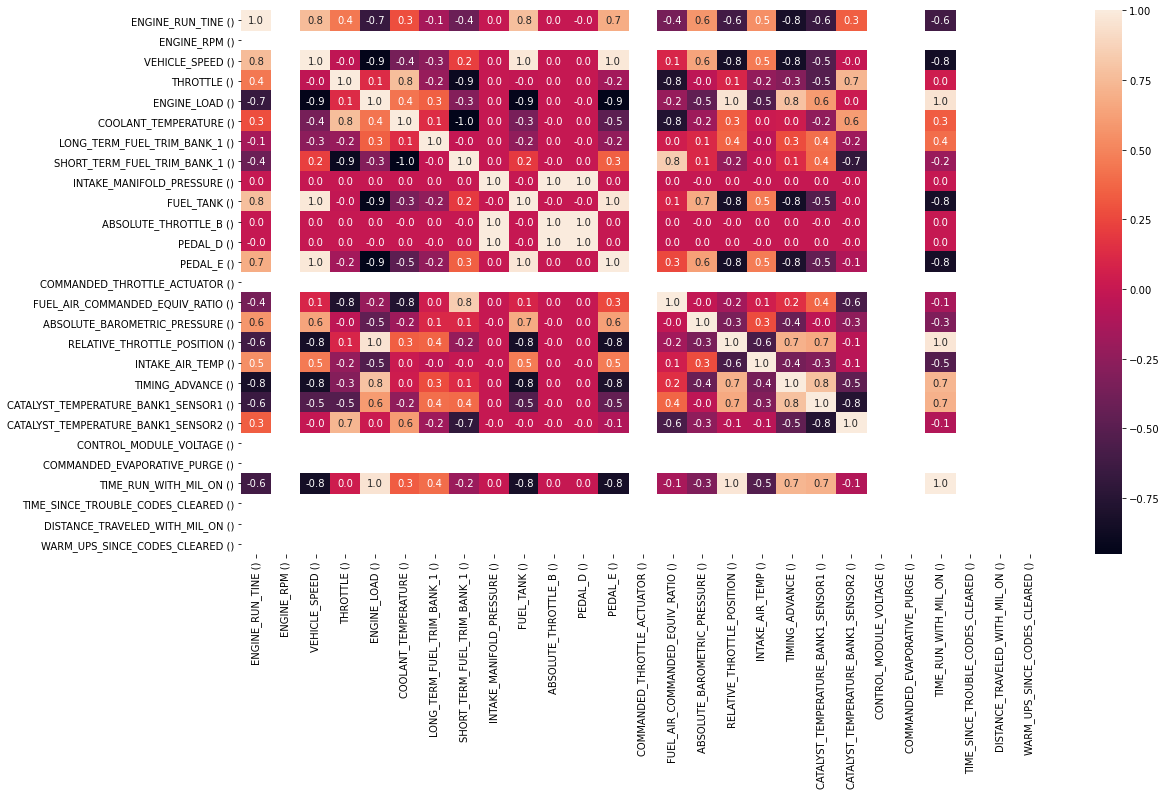

In [13]:
car2 = pd.read_csv('idle8.csv')
plt.figure(figsize=(18,10))
sns.heatmap(car2.corr(method = 'pearson'), annot=True, fmt=".1f");

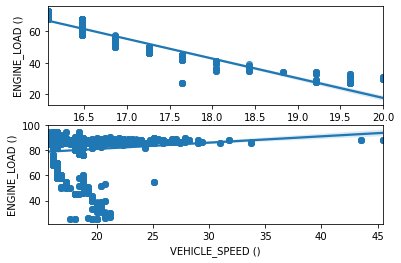

In [14]:
plt.subplot(2,1,1)
sns.regplot(data = car2, x = 'VEHICLE_SPEED ()', y = 'ENGINE_LOAD ()')
plt.subplot(2,1,2)
sns.regplot(data = car1, x = 'VEHICLE_SPEED ()', y = 'ENGINE_LOAD ()')

In [15]:
x2 = car2.drop(columns = ['ENGINE_RUN_TINE ()',                     
'ENGINE_RPM ()',                            
'ENGINE_LOAD ()',                           
'COOLANT_TEMPERATURE ()',                   
'LONG_TERM_FUEL_TRIM_BANK_1 ()',            
'INTAKE_MANIFOLD_PRESSURE ()',              
'COMMANDED_THROTTLE_ACTUATOR ()',           
'FUEL_AIR_COMMANDED_EQUIV_RATIO ()',        
'RELATIVE_THROTTLE_POSITION ()',            
'INTAKE_AIR_TEMP ()',                       
'TIMING_ADVANCE ()',                       
'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',    
'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()',    
'CONTROL_MODULE_VOLTAGE ()',                
'COMMANDED_EVAPORATIVE_PURGE ()',           
'TIME_RUN_WITH_MIL_ON ()',                  
'TIME_SINCE_TROUBLE_CODES_CLEARED ()',      
'DISTANCE_TRAVELED_WITH_MIL_ON ()',         
'WARM_UPS_SINCE_CODES_CLEARED ()',
'FUEL_TANK ()'                        ])

y2 = car2['FUEL_TANK ()']
y2=y2.astype('float')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x2,
                                                    y2,
                                                    test_size=0.3, random_state=42)

[ 7.52037847e-01  9.35175679e-03 -7.71032604e-04 -2.07348574e+06
 -1.03647073e+06  3.96526618e-01  5.95192536e-01] 66261616.48233171
[ 1.01900108e+03 -2.88039157e+03 -7.45277826e+02  1.63863554e+03
 -2.06051187e+04 -1.46030227e+04 -3.37332636e+03  5.02706684e+02
 -1.26643014e-01  1.47840203e-02 -6.87306949e-02 -2.18331326e+05
  1.10604056e+05  3.91294681e-01 -1.20537787e+00 -4.26887458e-04
  1.16694063e-02  9.23923628e+04 -4.67430708e+04  2.11017873e-02
 -1.33540841e-01  4.89136461e-03 -9.53547165e+04  4.82143912e+04
  1.82604772e-02  1.76228678e-01 -6.22260593e+05  1.10483003e+06
 -2.44942688e+05  8.07183177e+01 -3.30179090e+05  1.24089545e+05
 -5.60635187e+01 -2.14102275e-01  1.39510278e-01  5.55443555e-01] -69458103.57260819
-2.2310772064801228


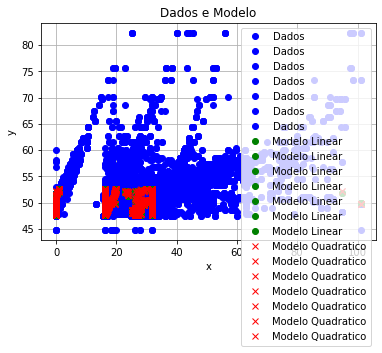

In [17]:
modelo_linear = LinearRegression().fit(x_train, y_train)
a_modelo = modelo_linear.coef_
b_modelo = modelo_linear.intercept_
print(a_modelo, b_modelo)

func_2 = PolynomialFeatures(degree=2)
xt_ = func_2.fit_transform(x_train)
modelo_quadratico = LinearRegression().fit(xt_ , y_train)
a_modelo = modelo_quadratico.coef_
b_modelo = modelo_quadratico.intercept_
print(a_modelo, b_modelo)

fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Dados')
plt.plot(x_train, modelo_linear.predict(x_train), 'og', linewidth=3, label='Modelo Linear')
plt.plot(x_train, modelo_quadratico.predict(xt_), 'xr', linewidth=3, label='Modelo Quadratico')
ax.set(xlabel='x', ylabel='y', title='Dados e Modelo')
plt.legend()
ax.grid()

y_pred_linear = modelo_linear.predict(x_test)

xtest_ = func_2.fit_transform(x_test)
y_pred_quadratico = modelo_quadratico.predict(xtest_)

erro_linear = sum(y_test-y_pred_linear)
erro_quadratico = y_test-y_pred_quadratico
print(erro_linear)

In [18]:
# Mean Squared Error é uma métrica
MSE_linear = mean_squared_error(y_test, y_pred_linear)
MSE_quadratico = mean_squared_error(y_test, y_pred_quadratico)
print(MSE_linear, MSE_quadratico)

# Outra métrica de desempenho
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MAE_quadratico = mean_absolute_error(y_test, y_pred_quadratico)
print(MAE_linear, MAE_quadratico)

# Outra métrica de desempenho
R2_linear = modelo_linear.score(x_train, y_train)
R2_quadratico = modelo_quadratico.score(xt_, y_train)
print(R2_linear, R2_quadratico)


0.05766124575875116 0.9005947067684428
0.18419178526842347 0.25470557603192534
0.9744246326189401 0.9772594861696144
